activation='exp' for last dense layer 
specify learning rate using args



In [2]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="model.best.hdf5", 
                             save_weights_only=False,
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True,
                             period=5)

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', 
                          histogram_freq=1, 
                          write_graph=False, 
                          write_grads=True, 
                          write_images=True)

baseline_history = model.fit(x_train, y_train, 
                    validation_split=0.25, 
                    epochs=10, 
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[checkpoint, tensorboard])

Train on 75 samples, validate on 25 samples
Epoch 1/10
75/75 [==============================] - 3s 46ms/step - loss: 4.3730 - acc: 0.1067 - val_loss: 2.3911 - val_acc: 0.1200
Epoch 2/10
75/75 [==============================] - 3s 39ms/step - loss: 2.3149 - acc: 0.1867 - val_loss: 2.3395 - val_acc: 0.0400
Epoch 3/10
75/75 [==============================] - 3s 39ms/step - loss: 2.3125 - acc: 0.1333 - val_loss: 2.3331 - val_acc: 0.0400
Epoch 4/10
75/75 [==============================] - 3s 38ms/step - loss: 2.2934 - acc: 0.1333 - val_loss: 2.3691 - val_acc: 0.0400
Epoch 5/10
75/75 [==============================] - 3s 37ms/step - loss: 2.2718 - acc: 0.1867 - val_loss: 2.4567 - val_acc: 0.0400

Epoch 00005: val_acc improved from -inf to 0.04000, saving model to model.best.hdf5
Epoch 6/10
75/75 [==============================] - 3s 37ms/step - loss: 2.2652 - acc: 0.1600 - val_loss: 2.4333 - val_acc: 0.0400
Epoch 7/10
75/75 [==============================] - 3s 41ms/step - loss: 2.2840 - acc

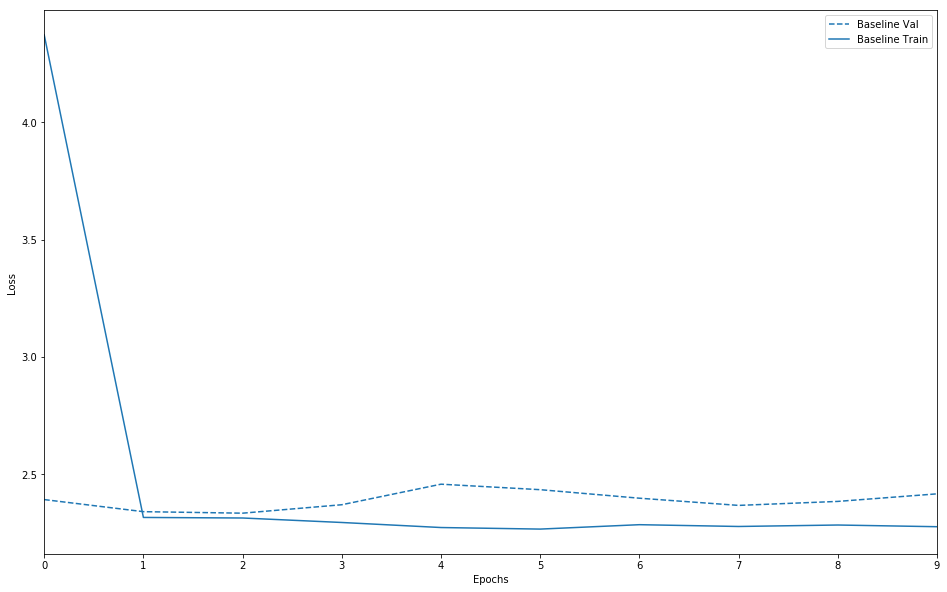

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 


def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history)])


In [4]:
model.inputs

[<tf.Tensor 'conv2d_1_input:0' shape=(?, 100, 100, 3) dtype=float32>]

In [5]:
model.outputs

[<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]

In [15]:
from contextlib import redirect_stdout

with open('model.summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

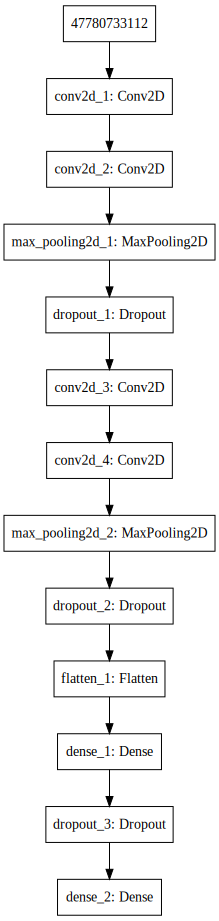

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))